<a href="https://colab.research.google.com/github/yuicao4234/DSC-x-CBRE-Datathon-2024/blob/main/Calcuations_and_Saving_to_CSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from pathlib import Path
data_path = Path("/content/drive/My Drive/Datathon CBRE DSC/img/")
img_path = data_path / 'DSC Datathon IMG'

In [ ]:
def walk_through_dir(dir_path):
  """Walks through dir_path, returning its contents"""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
walk_through_dir(img_path)

There are 5 directories and 0 images in '/content/drive/My Drive/Datathon CBRE DSC/img/DSC Datathon IMG'.
There are 0 directories and 68 images in '/content/drive/My Drive/Datathon CBRE DSC/img/DSC Datathon IMG/1'.
There are 0 directories and 67 images in '/content/drive/My Drive/Datathon CBRE DSC/img/DSC Datathon IMG/2'.
There are 0 directories and 16 images in '/content/drive/My Drive/Datathon CBRE DSC/img/DSC Datathon IMG/3'.
There are 0 directories and 17 images in '/content/drive/My Drive/Datathon CBRE DSC/img/DSC Datathon IMG/4'.
There are 0 directories and 48 images in '/content/drive/My Drive/Datathon CBRE DSC/img/DSC Datathon IMG/5'.


/content/drive/My Drive/Datathon CBRE DSC/img/DSC Datathon IMG/1/1652909348_1.png
Random image path: /content/drive/My Drive/Datathon CBRE DSC/img/DSC Datathon IMG/1/1652909348_1.png
Image Class: 1
Image height: 753
Image width: 328


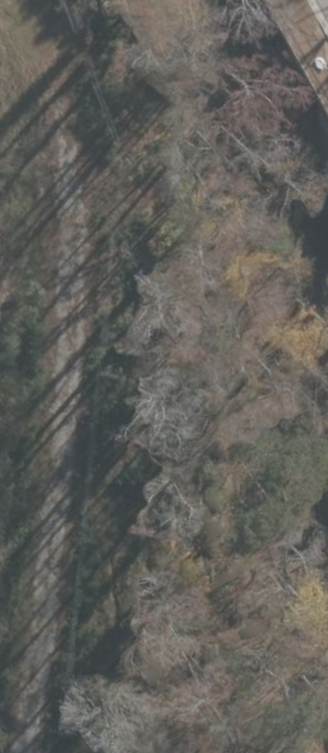

In [ ]:
import random
from PIL import Image

# Set seed
#random.seed(42)

# 1. Get all image paths
img_path_list = list(img_path.glob("*/*.png"))


# 2. Pick a random image path
random_image_path = random.choice(img_path_list)
print(random_image_path)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem


# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image Class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

In [ ]:
  # Path to the directory containing the image files
img_path = Path("/content/drive/My Drive/Datathon CBRE DSC/img/DSC Datathon IMG")
image_dir = list(img_path.glob("*/*.png"))

# Path to the CSV file containing size data
atlanta_dat = Path("/content/drive/My Drive/Datathon CBRE DSC/Atlanta_supply_dat.xlsx - Atlanta_dat.csv")
uc_buildings = Path("/content/drive/My Drive/Datathon CBRE DSC/Atlanta_supply_dat.xlsx - UC_buildings.csv")

# Function to extract property_id and stage of construction from a filename
def parse_filename(filename):
    parts = filename.split('_')
    property_id = parts[0]
    stage = parts[1].split('.')[0]  # Remove file extension
    return property_id, stage

# Read the CSV file into a DataFrame
df = pd.read_csv(uc_buildings)

# Function to estimate completion time based on stage of construction and size
def estimate_completion_time(stage, size_sf):
    stage_progress = {
        'Undeveloped': 0,
        'Ground Broken': 25,
        'Concrete Pad': 45,
        'Framing Going up': 85,
        'Near completion or completed': 100
    }
    if size_sf < 100000:
        total_time = 2
    elif 100000 <= size_sf < 300000:
        total_time = 3
    elif 300000 <= size_sf < 600000:
        total_time = 4
    elif 600000 <= size_sf < 1000000:
        total_time = 5
    else:
        total_time = 6

    current_progress = stage_progress.get(stage, 0)
    remaining_time = total_time * (1 - current_progress / 100)
    return round(remaining_time, 2)
print(image_dir)
remaining_quarters_dict = {}

# Iterate over each file in the image directory
for img_path in image_dir:
    filename = img_path.name  # Get the filename as a string
    if filename.endswith('.png'):  # Make sure the file extension is correct
        property_id, stage = parse_filename(filename)
        # The following line may need error handling if a property ID is not found
        size_sf = df.loc[df['PropertyID'] == int(property_id), 'Size_sf'].values[0]  # Ensure size_sf is a float
        remaining_quarters = estimate_completion_time(stage, size_sf)
        print(f"Property ID {property_id}, Stage: {stage}, Size: {size_sf} sq ft, Remaining Time: {remaining_quarters} quarters")
        remaining_quarters_dict[int(property_id)] = remaining_quarters
    else:
        print(f"Property ID {property_id} not found in the CSV.")

print(f"Number of image files found: {len(image_dir)}")
remaining_quarters_dict

[PosixPath('/content/drive/My Drive/Datathon CBRE DSC/img/DSC Datathon IMG/1/1652886730_1.png'), PosixPath('/content/drive/My Drive/Datathon CBRE DSC/img/DSC Datathon IMG/1/1652894195_1.png'), PosixPath('/content/drive/My Drive/Datathon CBRE DSC/img/DSC Datathon IMG/1/1652917117_1.png'), PosixPath('/content/drive/My Drive/Datathon CBRE DSC/img/DSC Datathon IMG/1/1652923075_1.png'), PosixPath('/content/drive/My Drive/Datathon CBRE DSC/img/DSC Datathon IMG/1/1652901827_1.png'), PosixPath('/content/drive/My Drive/Datathon CBRE DSC/img/DSC Datathon IMG/1/1652892515_1.png'), PosixPath('/content/drive/My Drive/Datathon CBRE DSC/img/DSC Datathon IMG/1/1652892432_1.png'), PosixPath('/content/drive/My Drive/Datathon CBRE DSC/img/DSC Datathon IMG/1/1652894658_1.png'), PosixPath('/content/drive/My Drive/Datathon CBRE DSC/img/DSC Datathon IMG/1/1652916003_1.png'), PosixPath('/content/drive/My Drive/Datathon CBRE DSC/img/DSC Datathon IMG/1/1652901399_1.png'), PosixPath('/content/drive/My Drive/Data

{1652886730: 2.0,
 1652894195: 3.0,
 1652917117: 2.0,
 1652923075: 2.0,
 1652901827: 4.0,
 1652892515: 3.0,
 1652892432: 3.0,
 1652894658: 4.0,
 1652916003: 2.0,
 1652901399: 2.0,
 1652924378: 2.0,
 1652893757: 2.0,
 1652914963: 2.0,
 1652899850: 5.0,
 1652900995: 2.0,
 1652891475: 2.0,
 1652901443: 4.0,
 1652922891: 2.0,
 1652891637: 3.0,
 1652924318: 2.0,
 1652887425: 2.0,
 1652909360: 3.0,
 1652909340: 4.0,
 1652909348: 3.0,
 1652924375: 2.0,
 1652886563: 3.0,
 1652911371: 4.0,
 1652918934: 2.0,
 1652823299: 6.0,
 1652901960: 3.0,
 1652889892: 5.0,
 1652851823: 3.0,
 1652906855: 2.0,
 1652923078: 2.0,
 1652908410: 2.0,
 1652918768: 2.0,
 1652885024: 2.0,
 1652896181: 2.0,
 1652894196: 3.0,
 1652909835: 4.0,
 1652901733: 3.0,
 1652906868: 5.0,
 1652887969: 2.0,
 1652891362: 2.0,
 1652906157: 6.0,
 1652884453: 4.0,
 1652924289: 3.0,
 1652904999: 4.0,
 1652923065: 3.0,
 1652924292: 3.0,
 1652903451: 4.0,
 1652902999: 3.0,
 1652847325: 5.0,
 1652887966: 2.0,
 1652925116: 2.0,
 165291523

In [ ]:
atlanta_df = pd.read_csv(atlanta_dat)
uc_buildings_df = pd.read_csv(uc_buildings)
property_ids_from_df = set(uc_buildings_df['PropertyID'])



def calculate_adjusted_quarters(quarters):
    return round(quarters * 0.75)

# Convert 'YearQuarterGroundBroken' to periods assuming the input is in the format 'yyyy.Q#'
uc_buildings_df['YearQuarterGroundBroken'] = uc_buildings_df['YearQuarterGroundBroken'].apply(
    lambda x: pd.Period(f"{int(x)}Q1", freq='Q') if pd.notna(x) else pd.NaT
)

# Calculate the adjusted quarters for each PropertyID based on the dictionary
uc_buildings_df['AdjustedQuarters'] = uc_buildings_df['PropertyID'].map(remaining_quarters_dict).apply(calculate_adjusted_quarters)

# Function to add quarters to a period, handling None values
def add_quarters_to_period(period, quarters):
    if pd.isna(period) or quarters is None:
        return None
    return period + quarters

# Calculate estimated completion quarter for each property
uc_buildings_df['EstimatedCompletionYearQuarter'] = uc_buildings_df.apply(
    lambda x: add_quarters_to_period(x['YearQuarterGroundBroken'], x['AdjustedQuarters']),
    axis=1
)

# Convert the period to "yyyy.q" format for easier interpretation, handling None
uc_buildings_df['EstimatedCompletionYearQuarter'] = uc_buildings_df['EstimatedCompletionYearQuarter'].apply(
    lambda x: f"{x.year}.{x.quarter}" if not pd.isna(x) else None
)

# Optionally, convert the DataFrame column to a dictionary if needed
estimated_completion_dict = pd.Series(uc_buildings_df['EstimatedCompletionYearQuarter'].values, index=uc_buildings_df['PropertyID']).to_dict()

filtered_df = uc_buildings_df[uc_buildings_df['MarketCode'] == 'ATLANT']
uc_buildings_df['EstimatedCompletionYearQuarter'] = uc_buildings_df['PropertyID'].map(estimated_completion_dict)


# Group by 'EstimatedCompletionYearQuarter' and sum 'Size_sf' for each group
completion_size_aggregation = filtered_df.groupby('EstimatedCompletionYearQuarter')['Size_sf'].sum()

# Convert the aggregated Series to a dictionary
quarter_size_dict = completion_size_aggregation.to_dict()

# Print the dictionary to verify the results
print(quarter_size_dict)
print(estimated_completion_dict)


new_rows = []

# Append new rows based on quarter_size_dict
for quarter, size_sf in quarter_size_dict.items():
    new_row = pd.DataFrame({
        'MarketCode': ['ATLANT'],
        'MarketName': ['Atlanta'],
        'YearQuarter': [quarter],
        'Completions_sf': [size_sf],

    })
    new_rows.append(new_row)

# Concatenate new rows with the original DataFrame
atlanta_df = pd.concat([atlanta_df] + new_rows, ignore_index=True)

# Print DataFrame to check new rows were added correctly
print("DataFrame after appending new rows:", atlanta_df.tail(10), sep='\n')

# Convert 'YearQuarter' from '2000.1' directly to Period for proper sorting
atlanta_df['YearQuarter'] = atlanta_df['YearQuarter'].astype(float)


# Sort DataFrame by 'YearQuarter'
atlanta_df.sort_values('YearQuarter', inplace=True)

# Calculate 'stock_sf' by updating from the previous value
for i in range(1, len(atlanta_df)):
    if pd.isna(atlanta_df.at[i, 'Stock_sf']):
        atlanta_df.at[i, 'Stock_sf'] = atlanta_df.at[i - 1, 'Stock_sf'] + (atlanta_df.at[i, 'Completions_sf'] if pd.notna(atlanta_df.at[i, 'Completions_sf']) else 0)

# Convert 'YearQuarter' back to 'yyyy.Q' format for display purposes
atlanta_df['YearQuarter'] = atlanta_df['YearQuarter'].astype(str)

# Save the updated DataFrame back to CSV
atlanta_df.to_csv("/content/drive/My Drive/Datathon CBRE DSC/Updated_Atlanta_supply_dat.csv", index=False)
atlanta_df

{'2021.3': 45000, '2022.3': 864549, '2022.4': 2056157, '2023.1': 800000, '2023.3': 3164489, '2023.4': 3723862, '2024.1': 4612690, '2024.3': 741170, '2025.1': 2044826}
{1652916003: '2024.3', 1652901399: '2023.3', 1652907044: '2023.3', 1652887791: '2023.3', 1652900810: '2023.3', 1652905346: '2023.3', 1652916988: '2023.3', 1652917708: '2023.3', 1652918149: '2023.3', 1652901443: '2024.4', 1652900812: '2022.3', 1652905347: '2023.3', 1652913670: '2023.3', 1652926522: '2024.3', 1652926669: '2023.3', 1652908405: '2023.3', 1652909449: '2023.3', 1652876296: '2022.4', 1652901960: '2023.3', 1652810765: '2023.3', 1652889892: '2023.1', 1652914737: '2023.3', 1652907350: '2022.3', 1652851823: '2021.3', 1652915224: '2023.4', 1652912961: '2023.3', 1652906855: '2024.3', 1652894900: '2024.1', 1652923078: '2023.3', 1652893067: '2023.3', 1652908410: '2023.3', 1652918768: '2023.3', 1652885024: '2022.3', 1652896181: '2022.3', 1652894196: '2022.3', 1652909835: '2023.4', 1652901733: '2023.3', 1652923517: '2024.

,MarketCode,MarketName,YearQuarter,Stock_sf,Completions_sf,Stock_Under_Construction_sf,under_construction_as_a_percentage_of_Stock
0,ATLANT,Atlanta,2000.1,397465.0,4394,4098.0,1.031
1,ATLANT,Atlanta,2000.2,401081.0,3616,6109.0,1.523
2,ATLANT,Atlanta,2000.3,405850.0,4769,5352.0,1.319
3,ATLANT,Atlanta,2000.4,412672.0,6822,7892.0,1.912
4,ATLANT,Atlanta,2001.1,416867.0,4195,8298.0,1.991
...,...,...,...,...,...,...,...
95,ATLANT,Atlanta,2023.4,730346.0,12669,21891.0,2.997
101,ATLANT,Atlanta,2023.4,11384403.0,3723862,NaN,NaN
102,ATLANT,Atlanta,2024.1,15997093.0,4612690,NaN,NaN
103,ATLANT,Atlanta,2024.3,16738263.0,741170,NaN,NaN


In [ ]:
# Convert the dictionary keys to a set
keys_from_dict = set(remaining_quarters_dict.keys())

# Check if all DataFrame IDs are in the dictionary
missing_in_dict = property_ids_from_df - keys_from_dict  # IDs in DataFrame but not in the dictionary
extra_in_dict = keys_from_dict - property_ids_from_df   # IDs in the dictionary but not in the DataFrame

# Output the results
print("Missing in Dictionary:", missing_in_dict)
print("Extra in Dictionary:", extra_in_dict)
# Checking for perfect correspondence
if missing_in_dict or extra_in_dict:
    print("Not all IDs match between the DataFrame and the dictionary.")
else:
    print("All IDs match perfectly between the DataFrame and the dictionary.")

Missing in Dictionary: set()
Extra in Dictionary: set()
All IDs match perfectly between the DataFrame and the dictionary.
